In [ ]:
from google.colab import files

uploaded = files.upload()

Saving memo_dataset7.csv to memo_dataset7.csv


Complex models, such as Temporal Fusion Transformers, performed worse than simpler counterparts like LSTMs. This is likely due to the dataset being too small, making it difficult for these high-parameter, highly complex models to generalize effectively.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('memo_dataset2.csv')
df.index=pd.to_datetime(df.timestamp)

mul_dec = seasonal_decompose(df['MCP (Euro)'],model='multiplicative',period=24)

df['hour'] = df.index.hour
df['dayofweek'] = df.index.day_of_week
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['MCP_lag1'] = df['MCP (Euro)'].shift(1)
df['MCP_lag2'] = df['MCP (Euro)'].shift(2)
df['MCP_lag3'] = df['MCP (Euro)'].shift(3)
df['Trend'] = mul_dec.trend
df['Seasonal'] = mul_dec.seasonal
df = df.drop(columns=['tsun','timestamp'])

df = df.dropna()
df.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),MCP (Euro),temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,hour,dayofweek,quarter,month,year,dayofyear,MCP_lag1,MCP_lag2,MCP_lag3,Trend,Seasonal
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-06-01 12:00:00,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,54.998618,23.2,14.7,59.0,0.0,240.0,7.2,14.8,1014.4,12,3,2,6,2023,152,54.998618,56.178388,71.000894,79.468248,0.670691
2023-06-01 13:00:00,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,54.998293,21.2,14.8,67.0,0.0,116.0,8.3,16.7,1014.2,13,3,2,6,2023,152,54.998618,54.998618,56.178388,79.495157,0.680949
2023-06-01 14:00:00,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,54.998455,21.2,14.6,66.0,0.0,96.0,9.0,16.7,1013.9,14,3,2,6,2023,152,54.998293,54.998618,54.998618,79.530954,0.720946
2023-06-01 15:00:00,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,54.998618,21.8,14.2,62.0,0.0,310.0,7.2,18.5,1013.7,15,3,2,6,2023,152,54.998455,54.998293,54.998618,79.718375,0.823805
2023-06-01 16:00:00,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,54.999431,24.2,12.2,47.0,0.0,110.0,7.2,16.7,1011.9,16,3,2,6,2023,152,54.998618,54.998455,54.998293,79.938611,0.993686


In [ ]:
df.shape

(13175, 20)

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('memo_dataset7.csv')

columns = df.columns.tolist()
new_order = [columns[9]] + columns[:9] + columns[9:]
df = df[new_order]
df = df.loc[:, ~df.columns.duplicated()]
df = df[['MCP (Euro)', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'wpgt', 'pres', 'Trend', 'Seasonal', 'Residual',
 'year', 'hour', 'quarter', 'dayofyear', 'month', 'dayofweek','Import','Import natural gas','Import mg','Import kjf','Import dt','export_dt','export_kjf','export_mg','Export']]
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,Trend,Seasonal,Residual,year,hour,quarter,dayofyear,month,dayofweek,Import,Import natural gas,Import mg,Import kjf,Import dt,export_dt,export_kjf,export_mg,Export
0,54.998618,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023,12,2,152,6,3,91082.616667,23.614683,10.968217,2.843750,65.505950,5.368917,1.764517,1.284367,140605.683333
1,54.998293,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023,13,2,152,6,3,91150.084722,23.621990,10.970485,2.845063,65.512363,5.375576,1.765726,1.284314,140578.573611
2,54.998455,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023,14,2,152,6,3,91217.552778,23.629297,10.972753,2.846375,65.518775,5.382236,1.766936,1.284261,140551.463889
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023,15,2,152,6,3,91285.020833,23.636604,10.975021,2.847688,65.525188,5.388896,1.768146,1.284208,140524.354167
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023,16,2,152,6,3,91352.488889,23.643911,10.977289,2.849000,65.531600,5.395556,1.769356,1.284156,140497.244444


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dimension, model_dimension, n_heads, num_layers, output_dimension, dropout=0.2):
        super(TimeSeriesTransformer, self).__init__()
        self.input_layer = nn.Linear(input_dimension, model_dimension)
        self.transformer = nn.Transformer(
            d_model=model_dimension,
            nhead=n_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.output_layer = nn.Linear(model_dimension, output_dimension)

    def forward(self, src, target):
        src = self.input_layer(src)
        target = self.input_layer(target)
        output = self.transformer(src, target)
        return self.output_layer(output)

X = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd',
        'wpgt', 'pres', 'MCP_lag1', 'MCP_lag2', 'MCP_lag3', 'Trend', 'Seasonal', 'Residual', 'year', 'hour', 'quarter',
        'dayofyear', 'month', 'dayofweek']]
y = df['MCP (Euro)']

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

def walky(data, target, ws):
    Xs, ys = [], []
    for i in range(len(data) - ws):
        Xs.append(data[i:i + ws])
        ys.append(target[i + ws])
    return np.array(Xs), np.array(ys)

ws = 10
Xs, ys = walky(X_st, y.values, ws)

X_train = Xs[:10000]
y_train = ys[:10000]
X_test = Xs[10000:]
y_test = ys[10000:]

train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_ds = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64, shuffle=False)

input_dimension = X_train.shape[2]
model_dimension = 64
n_heads = 4
num_layers = 2
output_dimension = 1

model = TimeSeriesTransformer(input_dimension, model_dimension, n_heads, num_layers, output_dimension)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for src, trg in train_dl:
        optimizer.zero_grad()

        output = model(src, src)
        output = output[:, -1, 0]

        loss = criterion(output, trg)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    avg_loss = train_loss / len(train_dl)
    print(f"Epoch: {epoch + 1}, Train Loss: {avg_loss:.4f}")

model.eval()
predictions = []
with torch.no_grad():
    for src, trg in test_dl:
        output = model(src, src)
        predictions.extend(output[:, -1, 0].numpy())

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Epoch: 1, Train Loss: 8785.1980
Epoch: 2, Train Loss: 5773.3860
Epoch: 3, Train Loss: 3326.0563
Epoch: 4, Train Loss: 1924.8479
Epoch: 5, Train Loss: 1354.7050
Epoch: 6, Train Loss: 1099.9734
Epoch: 7, Train Loss: 960.6507
Epoch: 8, Train Loss: 868.1104
Epoch: 9, Train Loss: 795.9775
Epoch: 10, Train Loss: 744.2476
Epoch: 11, Train Loss: 697.4064
Epoch: 12, Train Loss: 654.0220
Epoch: 13, Train Loss: 621.8757
Epoch: 14, Train Loss: 589.6561
Epoch: 15, Train Loss: 555.4895
Epoch: 16, Train Loss: 536.4844
Epoch: 17, Train Loss: 499.1926
Epoch: 18, Train Loss: 482.4285
Epoch: 19, Train Loss: 454.6356
Epoch: 20, Train Loss: 437.0131
Epoch: 21, Train Loss: 407.1579
Epoch: 22, Train Loss: 395.2663
Epoch: 23, Train Loss: 385.6131
Epoch: 24, Train Loss: 342.2388
Epoch: 25, Train Loss: 320.9297
Epoch: 26, Train Loss: 324.5559
Epoch: 27, Train Loss: 297.5899
Epoch: 28, Train Loss: 288.0987
Epoch: 29, Train Loss: 285.2261
Epoch: 30, Train Loss: 281.4610
Epoch: 31, Train Loss: 249.6545
Epoch: 32, 

# TFT

In [ ]:
! pip uninstall -y pytorch-forecasting pytorch-lightning
! pip install pytorch-forecasting pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.9/181.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 53.4 MB/s eta 0:00:00


In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import copy
from pathlib import Path

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [ ]:
df['time_idx'] = np.arange(len(df))
df['group'] = 'all'
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,Trend,Seasonal,Residual,year,hour,quarter,dayofyear,month,dayofweek,Import,Import natural gas,Import mg,Import kjf,Import dt,export_dt,export_kjf,export_mg,Export,time_idx,group
0,54.998618,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023,12,2,152,6,3,91082.616667,23.614683,10.968217,2.843750,65.505950,5.368917,1.764517,1.284367,140605.683333,0,all
1,54.998293,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023,13,2,152,6,3,91150.084722,23.621990,10.970485,2.845063,65.512363,5.375576,1.765726,1.284314,140578.573611,1,all
2,54.998455,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023,14,2,152,6,3,91217.552778,23.629297,10.972753,2.846375,65.518775,5.382236,1.766936,1.284261,140551.463889,2,all
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023,15,2,152,6,3,91285.020833,23.636604,10.975021,2.847688,65.525188,5.388896,1.768146,1.284208,140524.354167,3,all
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023,16,2,152,6,3,91352.488889,23.643911,10.977289,2.849000,65.531600,5.395556,1.769356,1.284156,140497.244444,4,all


In [ ]:
df.shape

(10957, 37)

In [ ]:
max_prediction_len = 956
max_encoder_len = 10

training_cutoff = df['time_idx'].max() - max_prediction_len

training = TimeSeriesDataSet(
    df[lambda x: x.time_idx <= training_cutoff],
    time_idx = 'time_idx',
    target = 'MCP (Euro)',
    group_ids = ['group'],
    min_encoder_length = max_encoder_len // 2,
    max_encoder_length = max_encoder_len,
    min_prediction_length = 1,
    max_prediction_length = max_prediction_len,
    static_categoricals=['group'],
    static_reals = [],
    time_varying_known_categoricals=[],
    variable_groups={},
    time_varying_known_reals=['year','hour','quarter','dayofyear','month','dayofweek'],
    time_varying_unknown_reals=['co','no','no2','o3','so2','pm2_5','pm10','nh3','MCV (MWh)','temp','dwpt','rhum','prcp','wspd','wpgt','pres','Trend','Seasonal','MCP_lag1', 'MCP_lag2', 'MCP_lag3',],
    time_varying_unknown_categoricals=[],
    target_normalizer=GroupNormalizer(groups=['group'], transformation='softplus'),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

val = TimeSeriesDataSet.from_dataset(training, df, predict=True, stop_randomization=True)

batch_size = 128
train_dl = training.to_dataloader(train=True, batch_size= batch_size, num_workers=0)
val_dataloader = val.to_dataloader(train=False, batch_size = batch_size, num_workers=0)

In [ ]:
early_cb = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, verbose =False,mode = 'min')
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger('lightning_logs')

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.0005,
    hidden_size=64,
    attention_head_size=4,
    dropout=0.2,
    hidden_continuous_size=32,
    loss=QuantileLoss(),
    log_interval=10,
    optimizer='Adam',
    reduce_on_plateau_patience=4,
)

trainer = pl.Trainer(
    max_epochs=100,
    accelerator='gpu',
    enable_model_summary=True,
    gradient_clip_val=0.09708919713850264,
    limit_train_batches=40,
    callbacks=[lr_logger, early_cb],
    logger=logger,
)
trainer.fit(tft, train_dl, val_dataloader)

INFO: GPU available: True (cuda), used: True
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics  

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
predictions = tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
MAE()(predictions.output, predictions.y)

INFO: GPU available: True (cuda), used: False
INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


tensor(33.4865)

In [ ]:
import torch.nn.functional as F
mse = F.mse_loss(predictions.output, predictions.y[0])
print("Mean Squared Error:", mse.item())

Mean Squared Error: 3147.205078125


In [ ]:
raw_predictions = tft.predict(val_dataloader, mode="raw", return_x=True)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


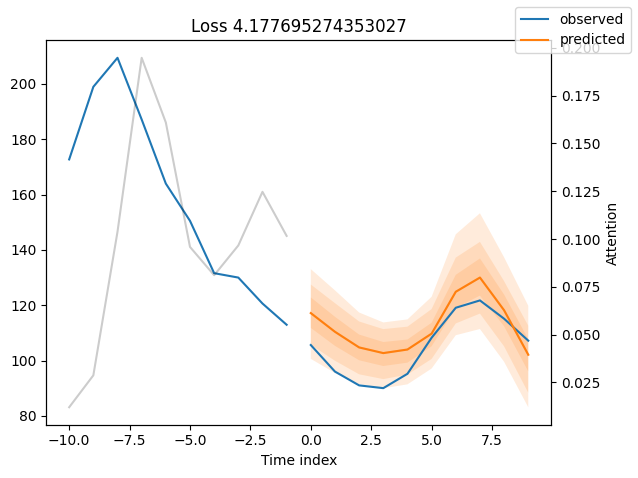

In [ ]:
import matplotlib.pyplot as plt
tft.plot_prediction(raw_predictions.x, raw_predictions.output,idx=0, add_loss_to_title=True)
plt.show()

In [ ]:
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
MAE()(baseline_predictions.output, baseline_predictions.y)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


tensor(33.7741, device='cuda:0')

In [ ]:
early_cb = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, verbose =False,mode = 'min')
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger('lightning_logs')

trainer = pl.Trainer(
    max_epochs = 100,
    accelerator='gpu',
    enable_model_summary=True,
    gradient_clip_val=0.09708919713850264,
    limit_train_batches=40,
    callbacks=[lr_logger, early_cb],
    logger=logger,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate = 0.0001,
    hidden_size=128,
    attention_head_size=4,
    dropout=0.2,
    hidden_continuous_size=32,
    loss=QuantileLoss(),
    log_interval=10,
    optimizer='Adam',
    reduce_on_plateau_patience=4,
)

print(f'Num parameters: {tft.size()}')

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Num parameters: 1282782


In [ ]:
trainer.fit(
    tft,
    train_dataloaders=train_dl,
    val_dataloaders=val_dataloader,
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | ModuleDict                      | 2.0 K  | train
4  | static_variable_selection          | VariableSelectionNetwork        | 34.6 K | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 346 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 81.5 K | train
7  | static_context_variable_selectio

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
predictions = tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
MAE()(predictions.output, predictions.y)

INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


tensor(16.1164)

In [ ]:
import torch.nn.functional as F
mse = F.mse_loss(predictions.output, predictions.y[0])
print("Mean Squared Error:", mse.item())

Mean Squared Error: 293.16864013671875


In [ ]:
mae = F.l1_loss(predictions.output, predictions.y[0])
print("MAE:", mae.item())

MAE: 72.42166137695312


In [ ]:
len(predictions.output[0])

956

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


{'encoder_length': <Figure size 1000x500 with 2 Axes>,
 'MCP (Euro)_center': <Figure size 1000x500 with 2 Axes>,
 'MCP (Euro)_scale': <Figure size 1000x500 with 2 Axes>,
 'year': <Figure size 1000x500 with 2 Axes>,
 'hour': <Figure size 1000x500 with 2 Axes>,
 'quarter': <Figure size 1000x500 with 2 Axes>,
 'dayofyear': <Figure size 1000x500 with 2 Axes>,
 'month': <Figure size 1000x500 with 2 Axes>,
 'dayofweek': <Figure size 1000x500 with 2 Axes>,
 'relative_time_idx': <Figure size 1000x500 with 2 Axes>,
 'co': <Figure size 1000x500 with 2 Axes>,
 'no': <Figure size 1000x500 with 2 Axes>,
 'no2': <Figure size 1000x500 with 2 Axes>,
 'o3': <Figure size 1000x500 with 2 Axes>,
 'so2': <Figure size 1000x500 with 2 Axes>,
 'pm2_5': <Figure size 1000x500 with 2 Axes>,
 'pm10': <Figure size 1000x500 with 2 Axes>,
 'nh3': <Figure size 1000x500 with 2 Axes>,
 'MCV (MWh)': <Figure size 1000x500 with 2 Axes>,
 'temp': <Figure size 1000x500 with 2 Axes>,
 'dwpt': <Figure size 1000x500 with 2 Axe

Error in callback <function _draw_all_if_interactive at 0x7d558a6cf250> (for post_execute):


KeyboardInterrupt: 

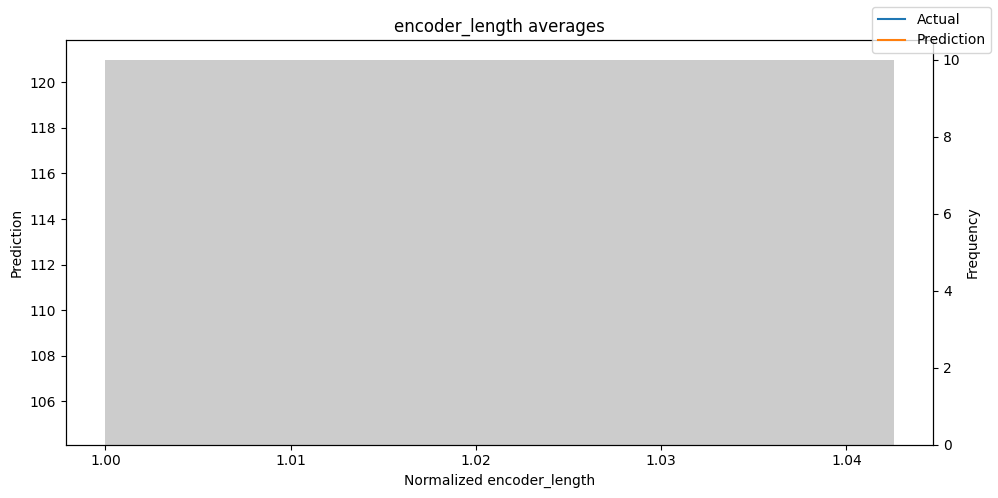

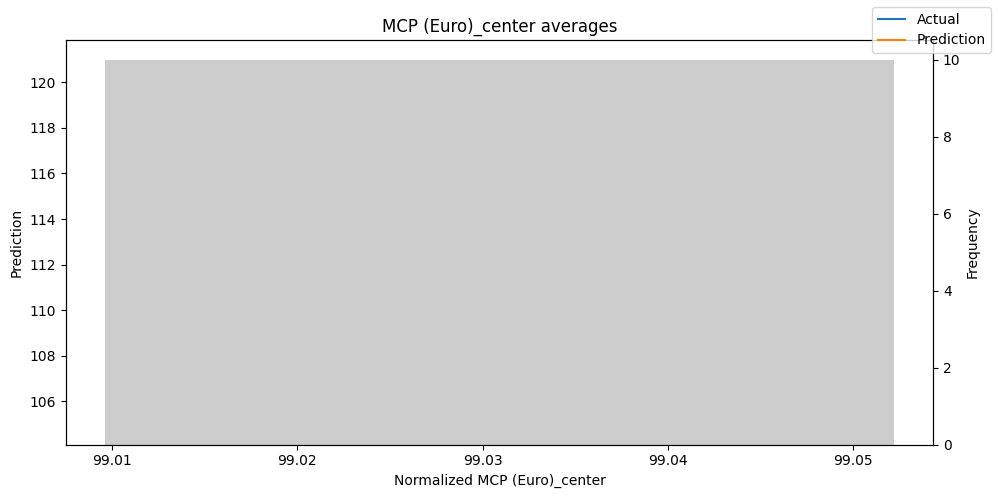

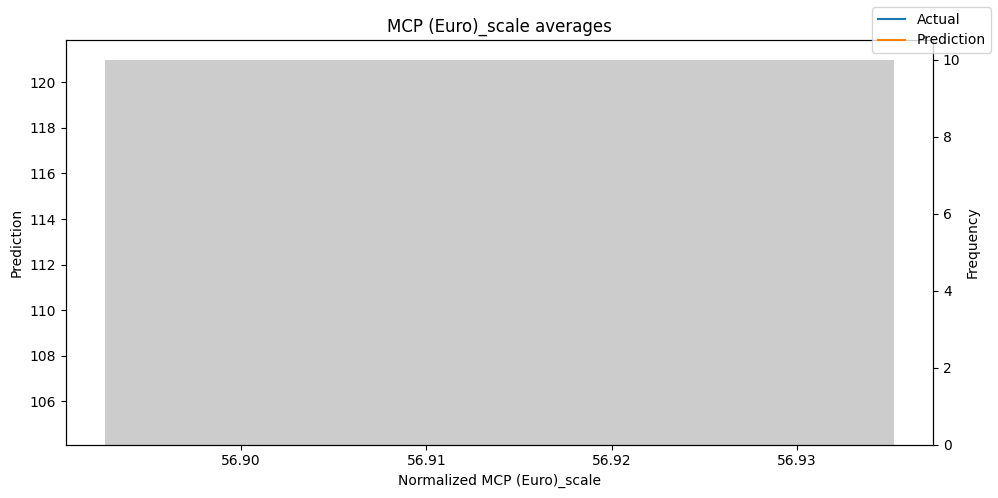

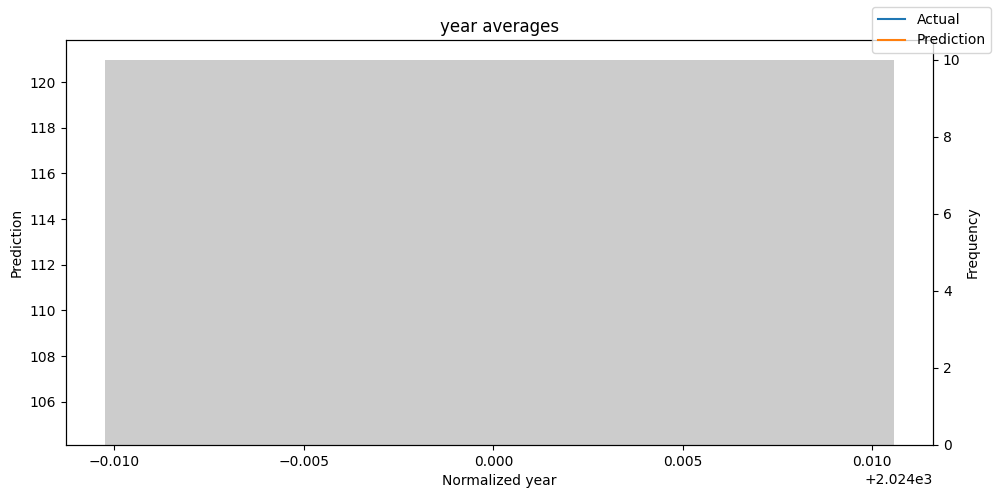

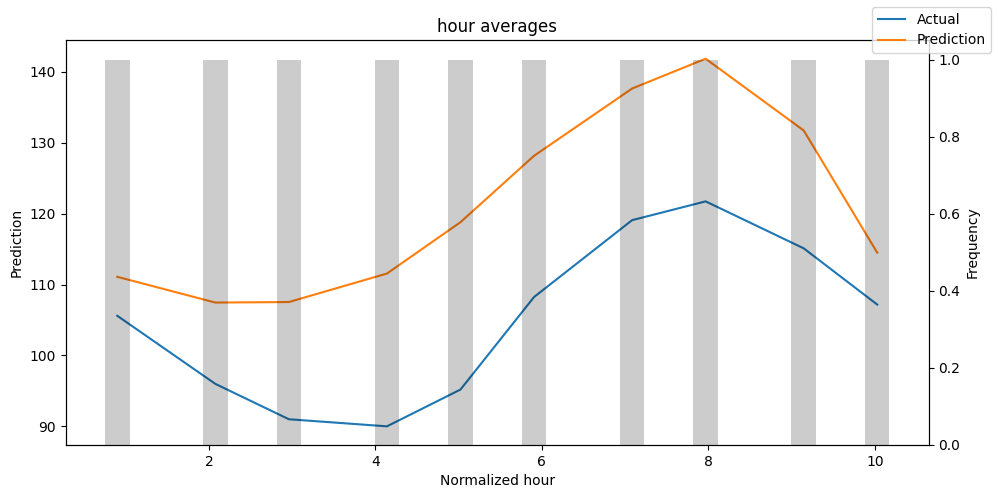

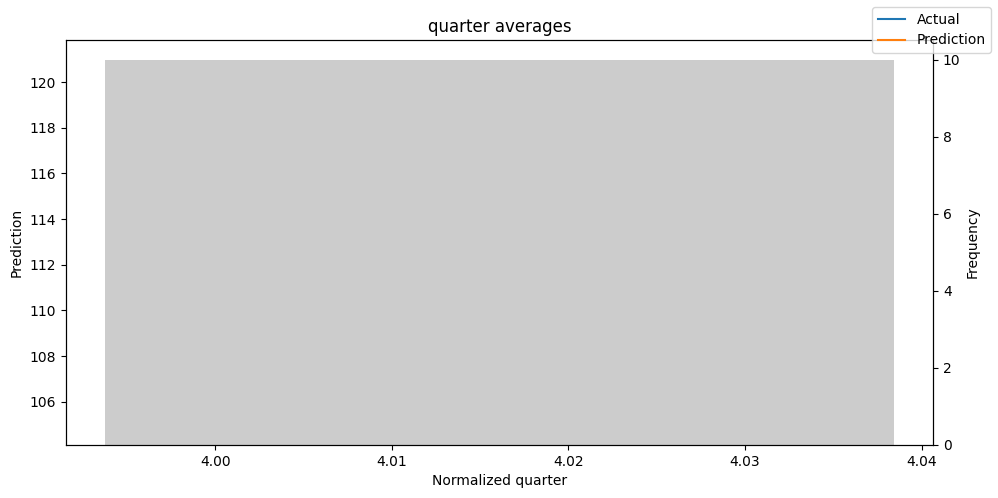

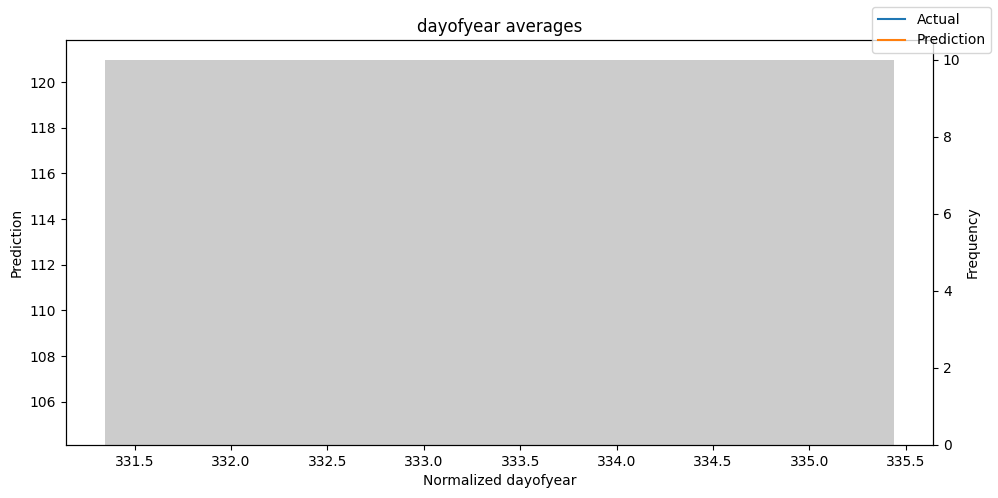

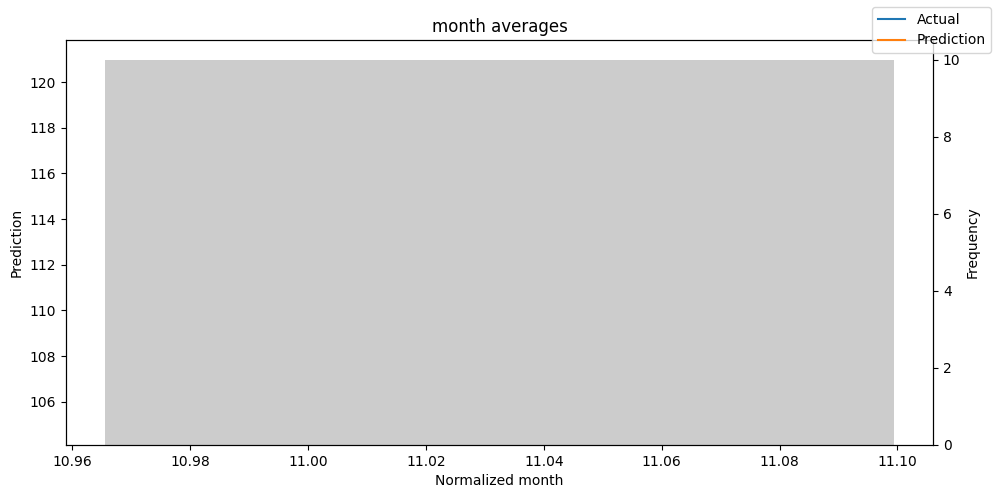

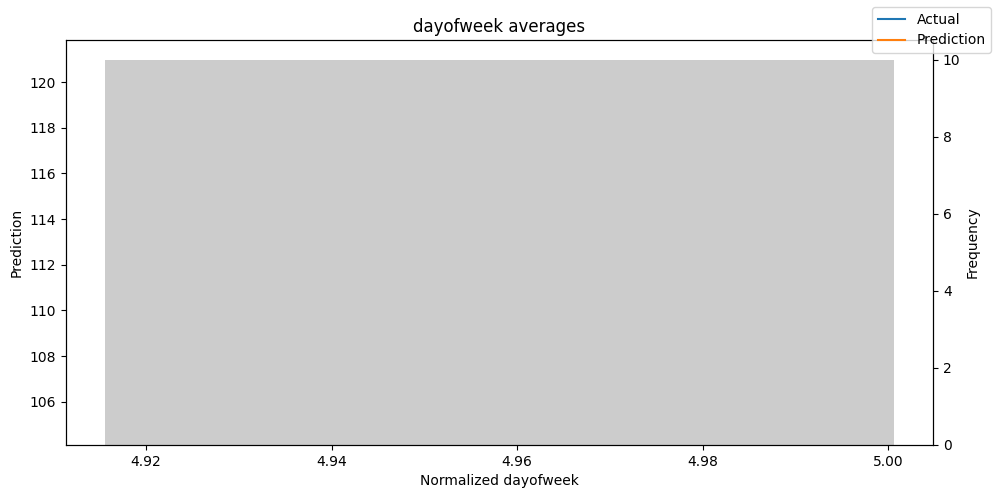

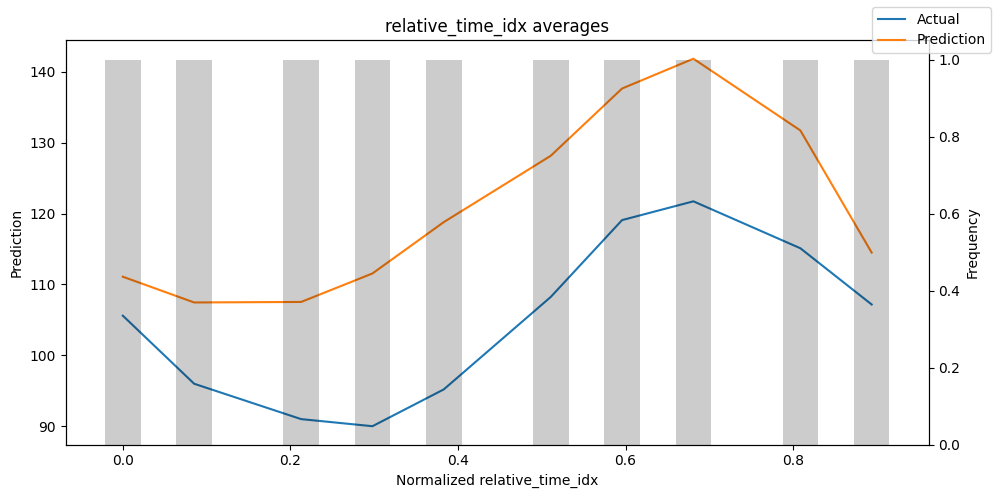

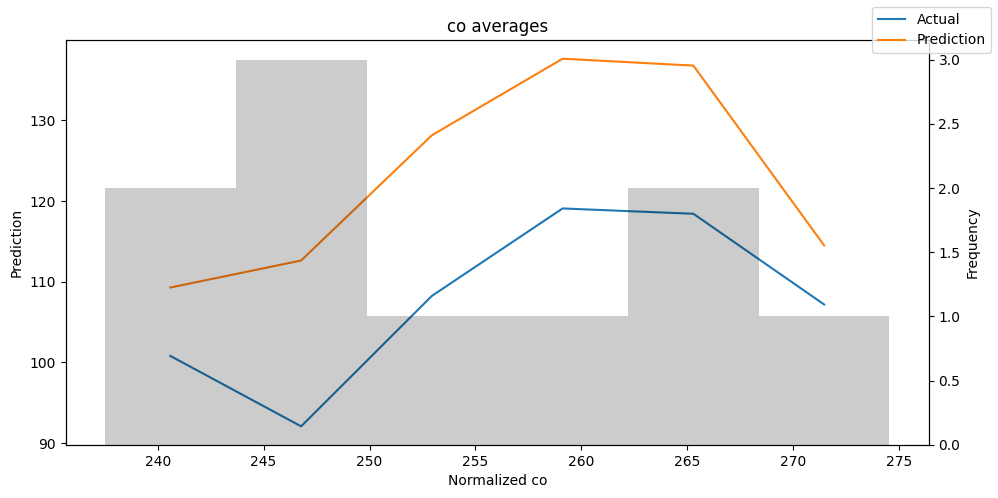

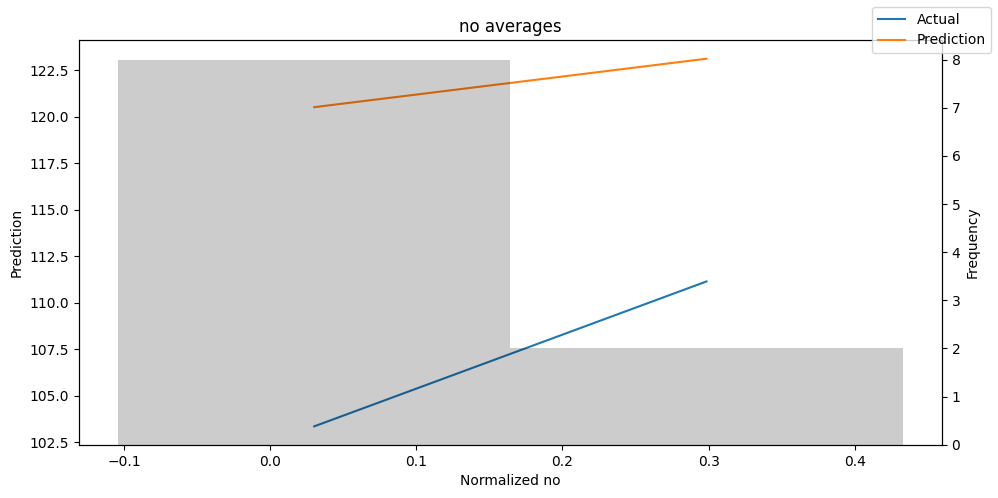

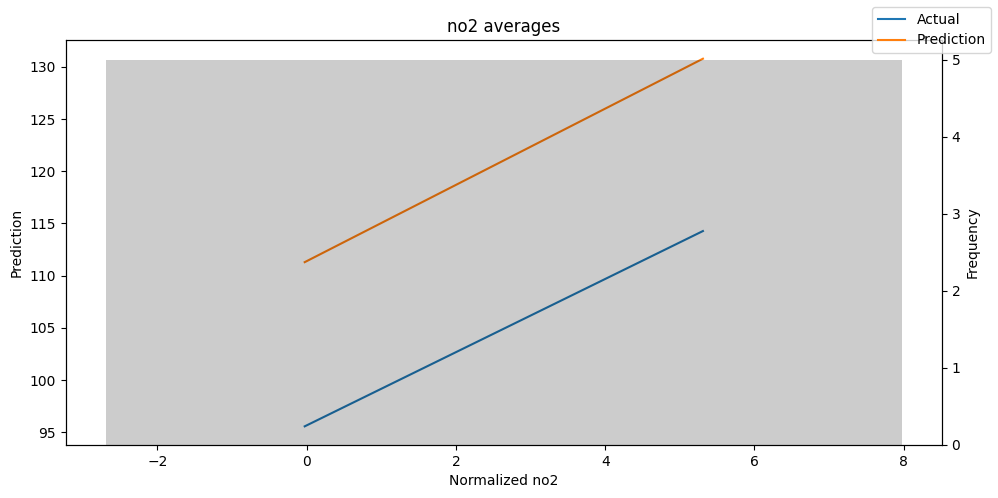

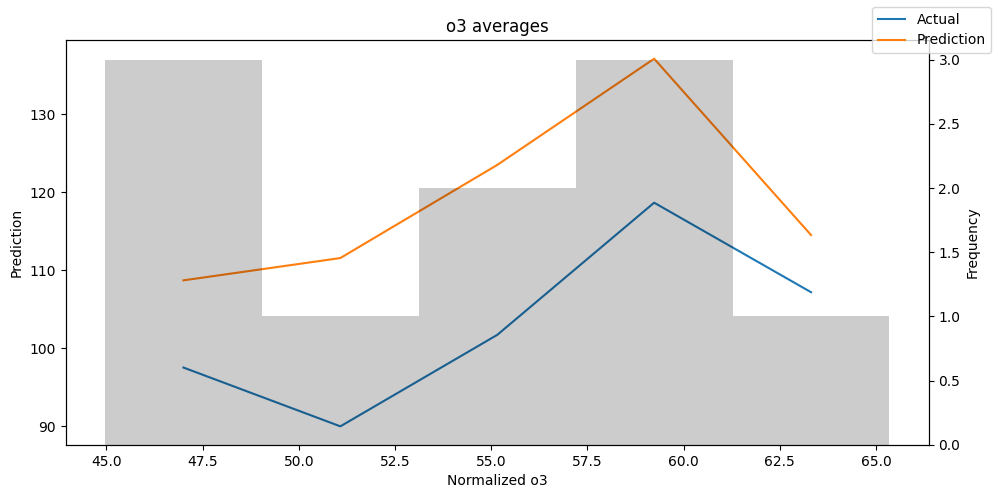

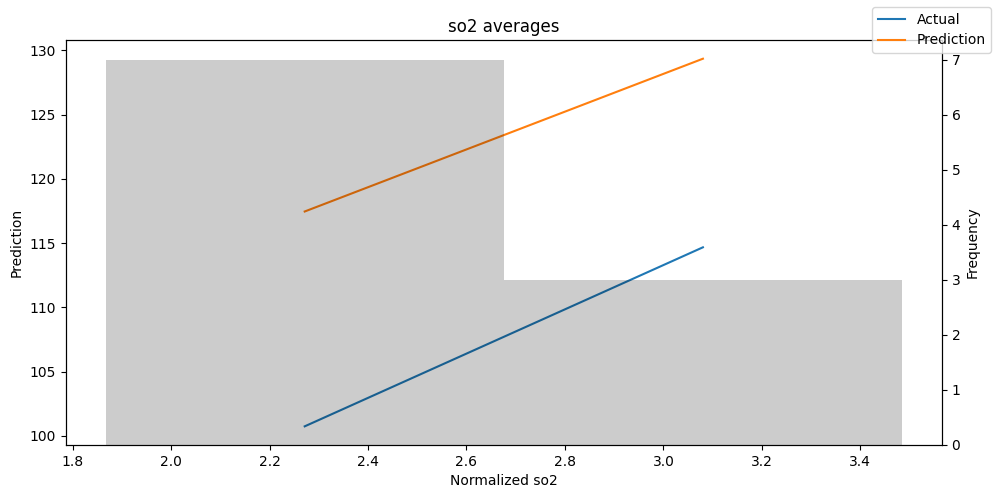

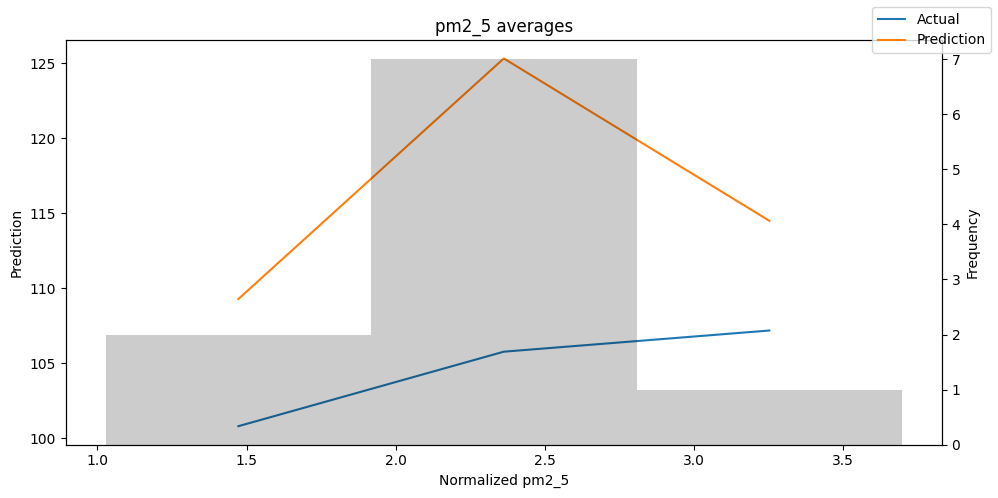

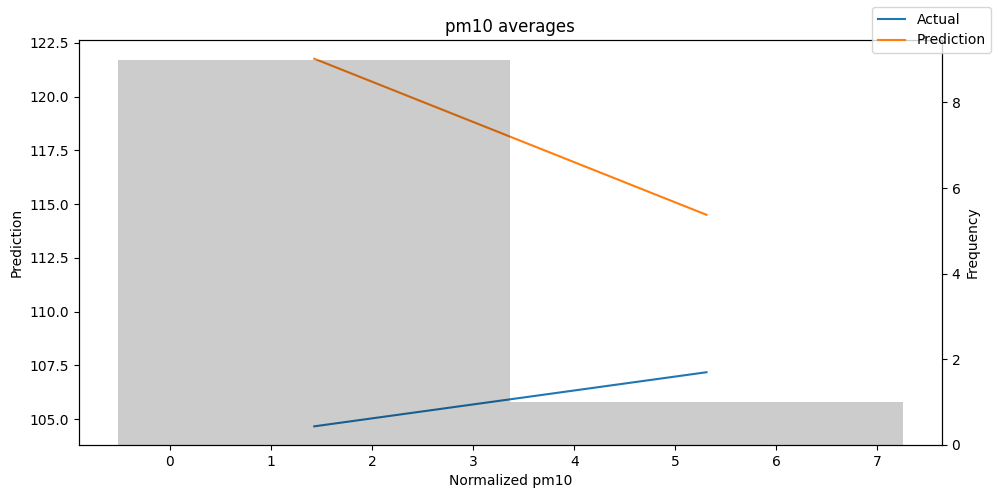

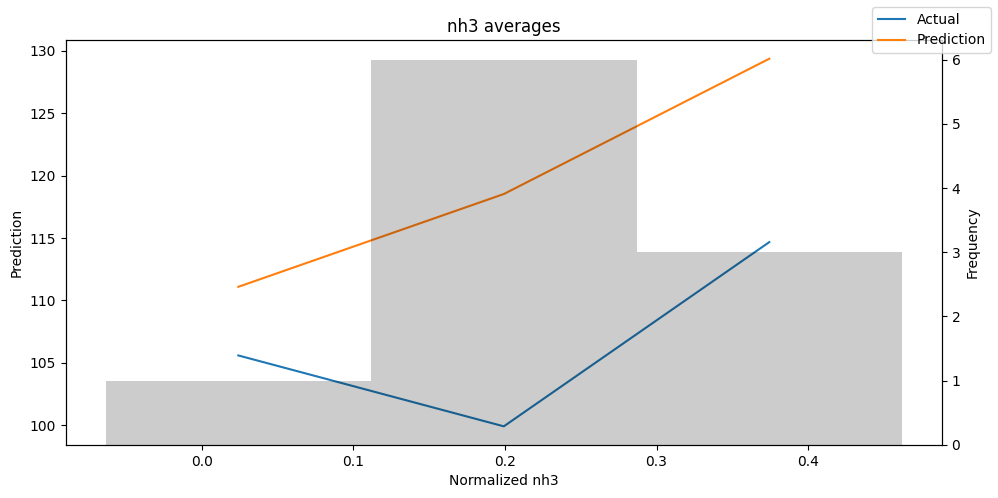

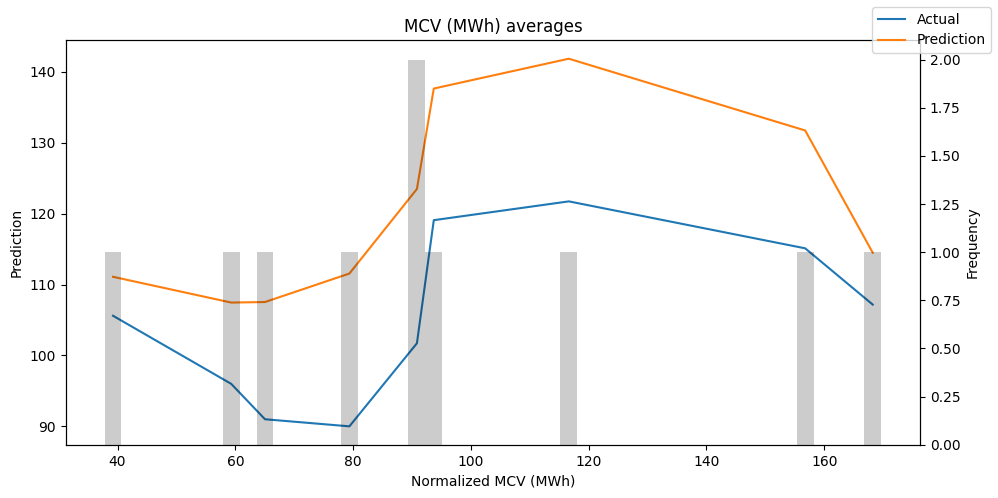

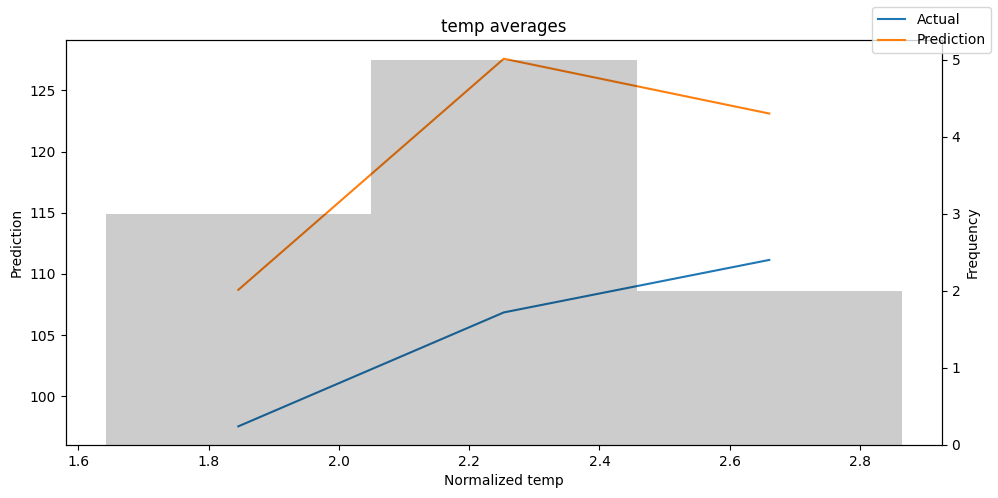

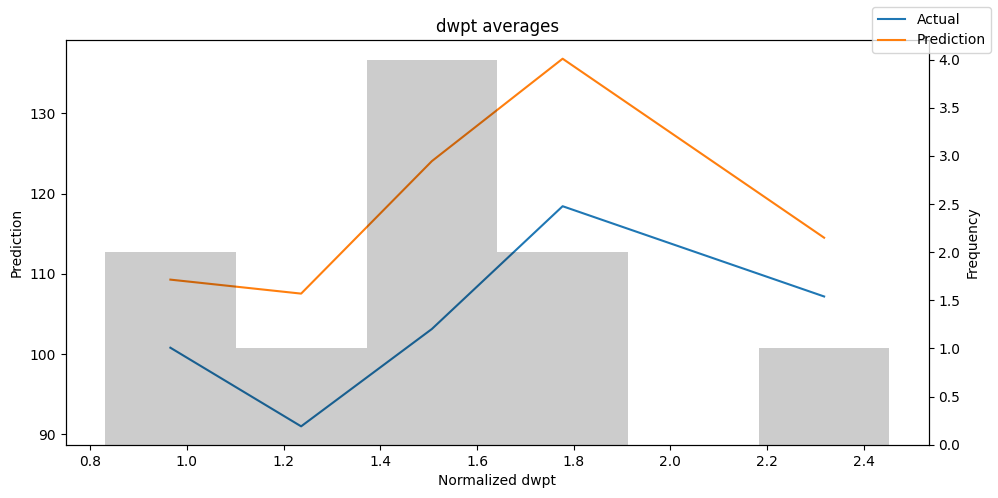

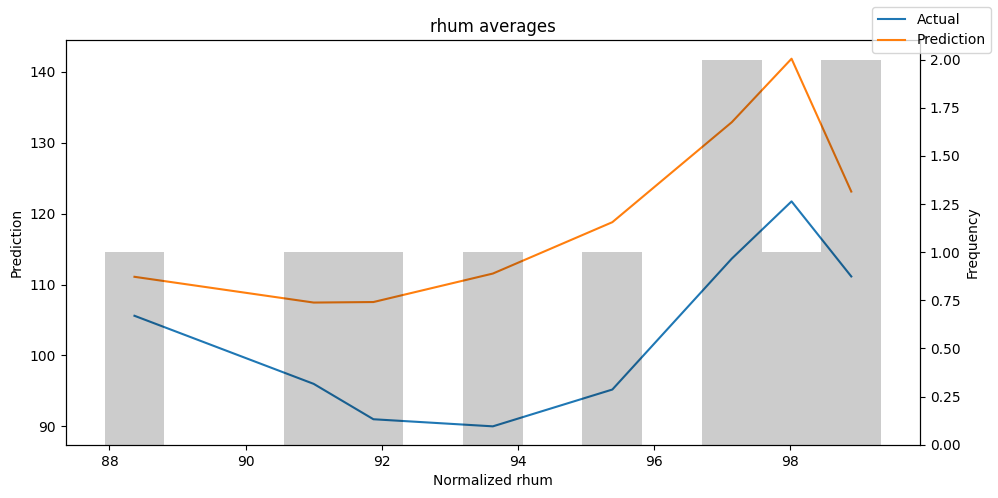

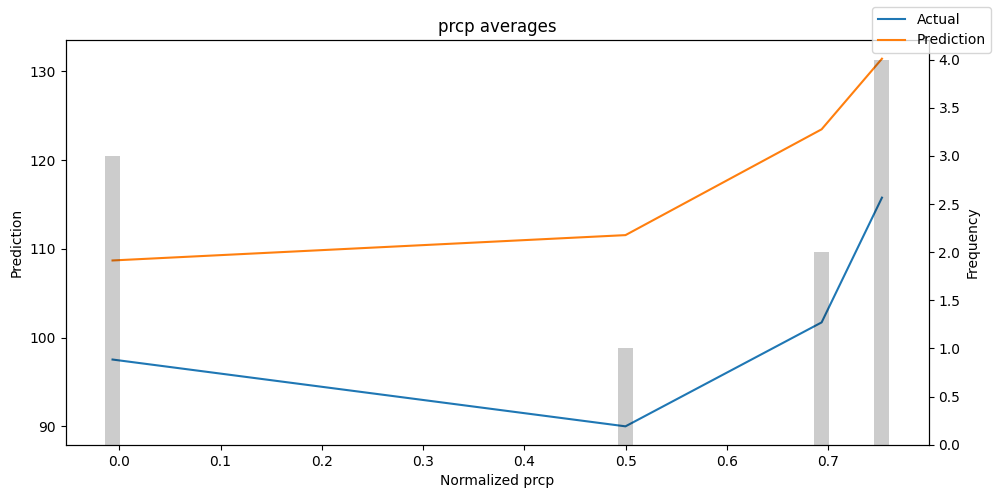

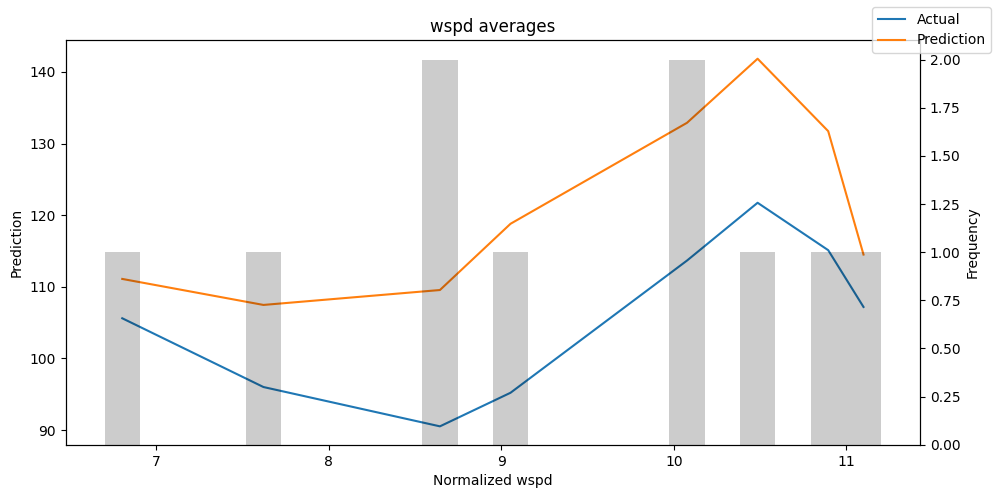

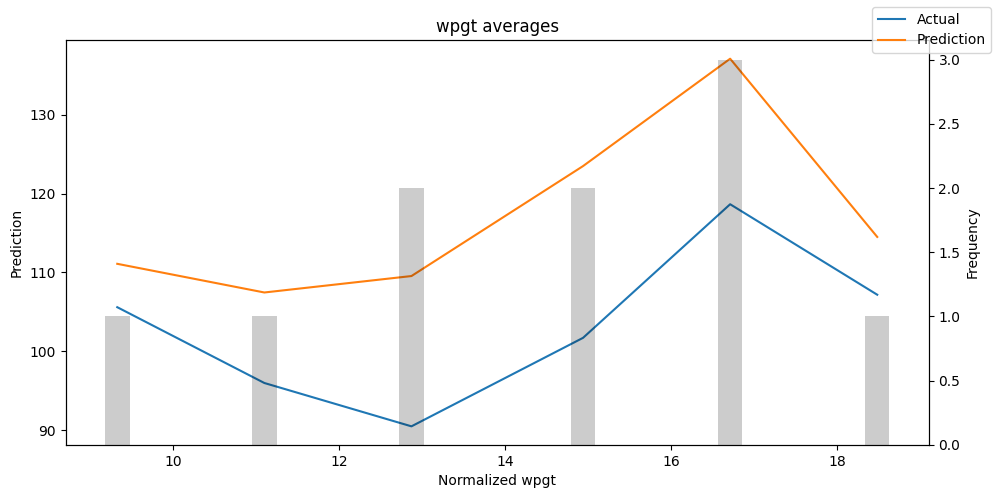

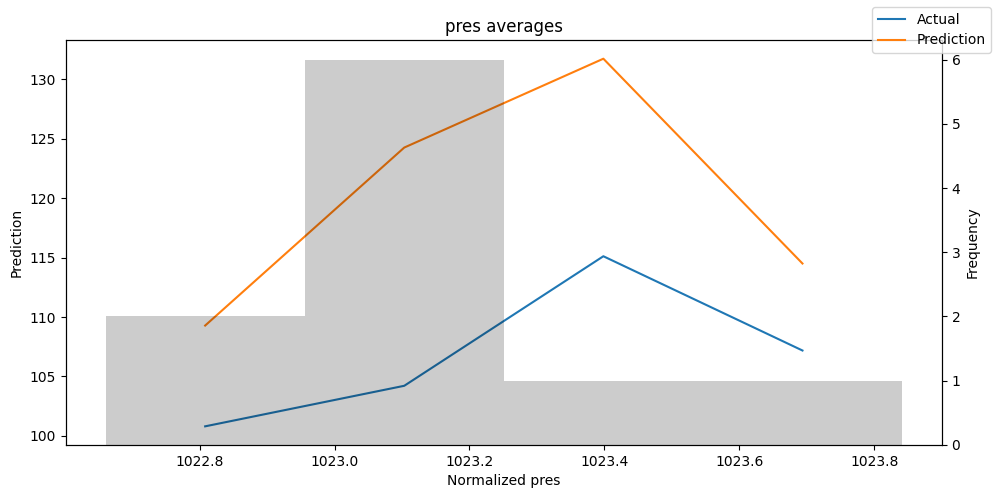

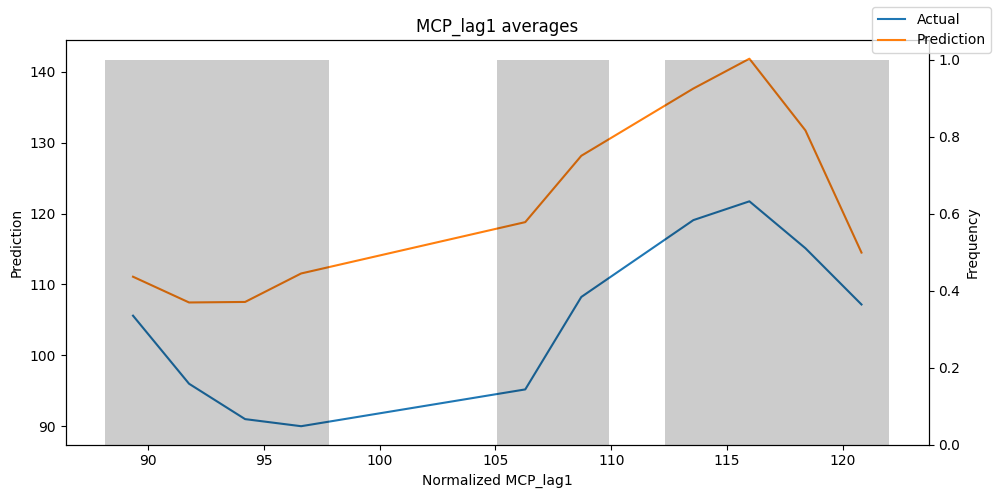

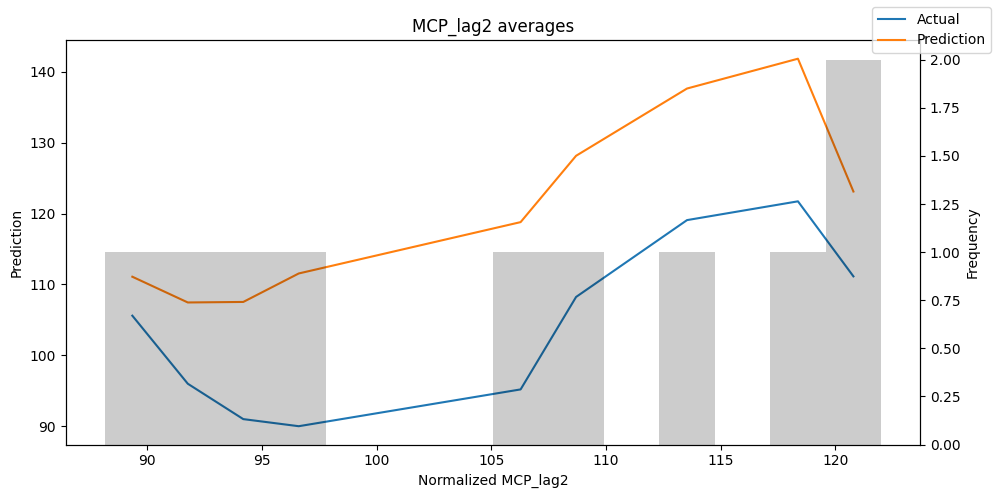

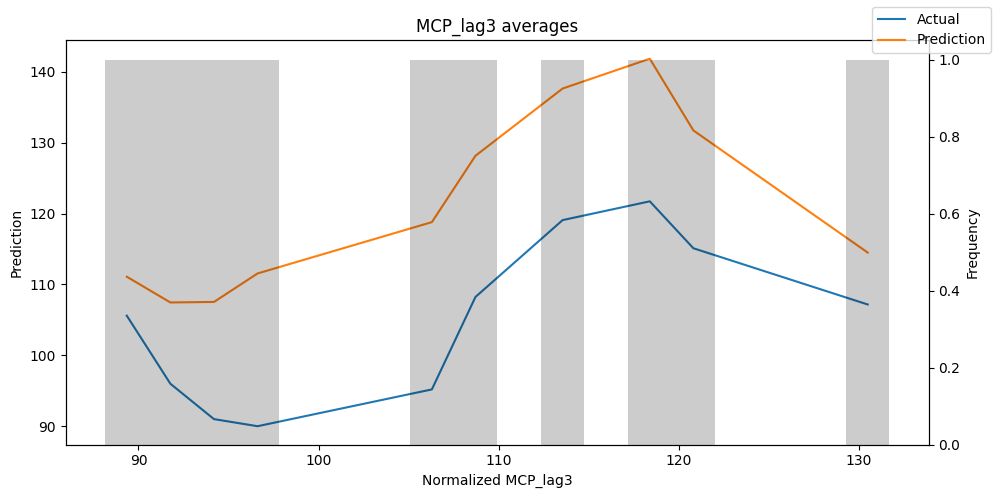

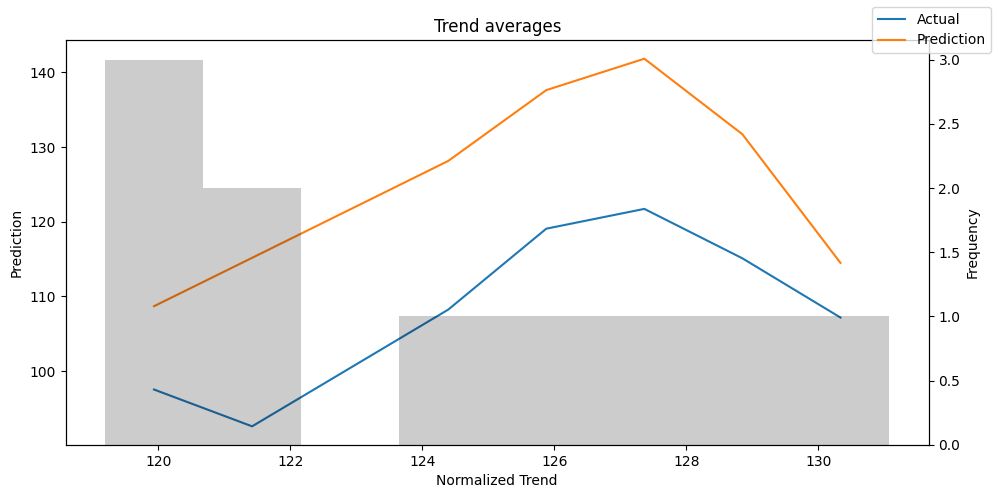

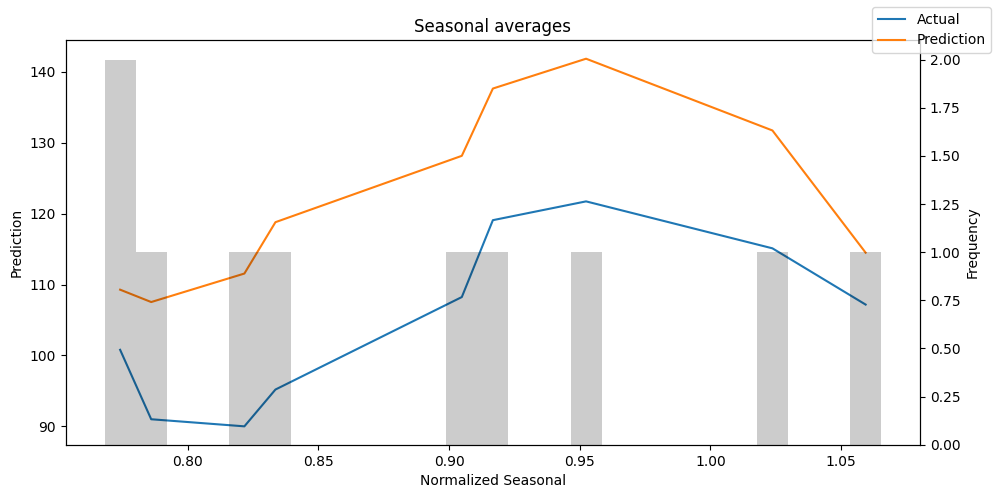

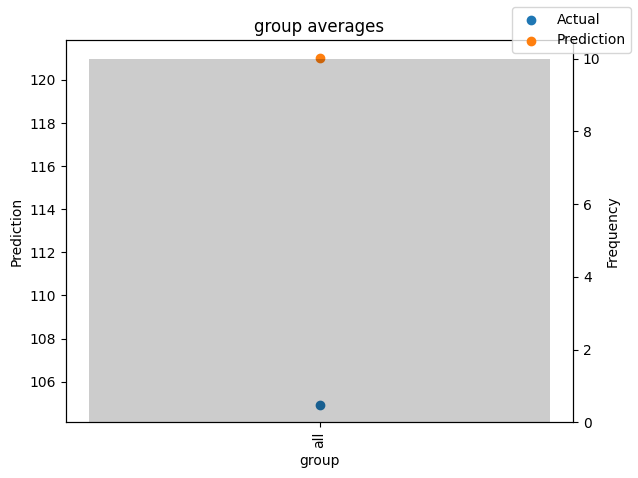

In [ ]:
predictions = tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = tft.calculate_prediction_actual_by_variable(predictions.x, predictions.output)
tft.plot_prediction_actual_by_variable(predictions_vs_actuals)

In [ ]:
raw_predictions = tft.predict(val_dataloader, mode="raw", return_x=True)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


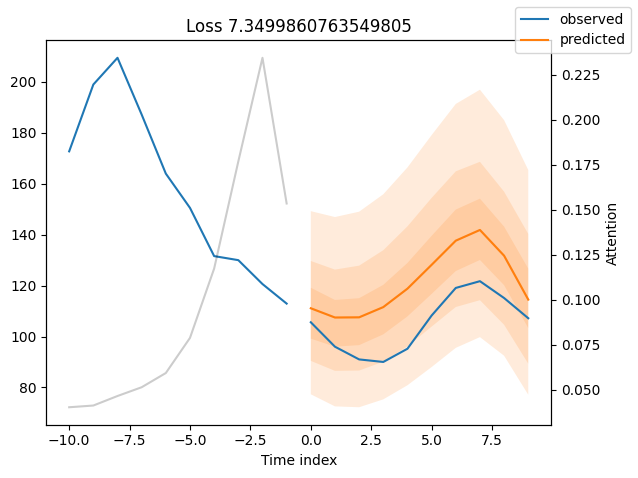

In [ ]:
import matplotlib.pyplot as plt
tft.plot_prediction(raw_predictions.x, raw_predictions.output,idx=0, add_loss_to_title=True)
plt.show()